In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

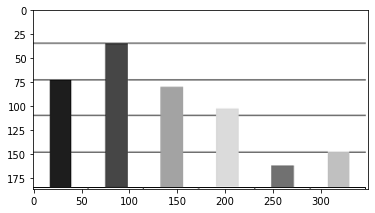

In [2]:
graph = cv2.imread("grafica.png", 0)

plt.figure()
plt.imshow(graph, cmap='gray')

plt.show()

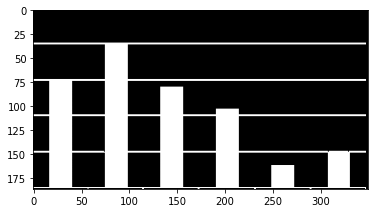

In [3]:
binary_mask = graph > 250

binary_mask=np.logical_not(binary_mask)
plt.figure()
plt.imshow(binary_mask, cmap='gray')

plt.show()

In [4]:
print(binary_mask.shape)

(187, 350)


In [5]:
def mover(xc):
    return xc+(binary_mask.shape[1]//15)
def subir(yc):
    return yc -(binary_mask.shape[0]//15)

def comparar(ix,iy,structure,matrix):
    sizey=structure.shape[0]
    sizex=structure.shape[1]//2
    
    if iy-sizey >0 and ix-sizex>0 and iy<matrix.shape[0] and ix+sizex+1<matrix.shape[1]:
        
        submatrix=matrix[iy-sizey:iy,ix-sizex:ix+sizex+1]
        
        

        for i in range(0,sizey):
            for j in range(0,sizex):
                if structure[i,j]!=submatrix[i,j]:
                    return False

        return True
    else:
        return False
    
    

In [6]:
structure=np.array([[True,True,True,True,True],[True,True,True,True,True],[True,True,True,True,True],[True,True,True,True,True],[True,True,True,True,True]])
lista=[]
valuex=0

while valuex<binary_mask.shape[1]:
    valuey=binary_mask.shape[0]-10
    aux=0
    while comparar(valuex,valuey,structure,binary_mask):
        aux+=1
        valuey=subir(valuey)
    if(aux>0):
        print(valuey)
    lista.append(aux)
    valuex=mover(valuex)
print(lista)


69
33
81
105
165
141
[0, 9, 0, 0, 12, 0, 8, 0, 0, 6, 0, 1, 0, 0, 3, 0]
